In [1]:
import numpy as np
import pandas as pd


In [2]:
# !pip install tensorflow

In [3]:
import tensorflow as tf
from sklearn.model_selection import  train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
# df=pd.read_csv("C:\\Users\\Jarvis\\Downloads\\Churn_Modeling.csv")
 df= pd.read_csv("C:\\Users\\Jarvis\\Downloads\\Churn_Modelling.csv")

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
x=df.iloc[: ,3:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [21]:
y=df.iloc[:,-1]
y
print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [11]:
df.corr()


C:\Users\Jarvis\AppData\Local\Temp\ipykernel_26640\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [32]:
lb=LabelEncoder()
x['Geography']= lb.fit_transform(x['Geography'])
x['Gender']= lb.fit_transform(x['Gender'])

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
sc=StandardScaler()

In [36]:
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
loss_fn = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation= 'relu',input_dim = x_train.shape[1]), #input layer
    tf.keras.layers.Dense(64,activation ='relu',),   # hidden layer
    tf.keras.layers.Dense(1,activation= 'sigmoid')  # output layer
])

In [50]:
# define loss function and metrics
loss_fn = tf.keras.losses.BinaryCrossentropy()
metrics=['accuracy']

In [51]:
# define optimizer with momentum
learning_rate =0.001
momentum=0.9
optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate , momentum=momentum)

In [53]:
# compile the model
model.compile(optimizer= optimizer ,loss = loss_fn , metrics= metrics)

In [54]:
# train the model
epochs= 10 
batch_size = 32

In [56]:
# evaluate the midel
test_loss , test_acc = model.evaluate(x_test,y_test)

63/63 [==============================] - 4s 2ms/step - loss: 0.7660 - accuracy: 0.3740


In [57]:
print('test loss',test_loss)
print('test acc',test_acc)

test loss 0.7659990191459656
test acc 0.37400001287460327


# churn modeling by campus x

In [76]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split

In [54]:
 df= pd.read_csv("C:\\Users\\Jarvis\\Downloads\\Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.corr()

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_10744\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [55]:
df=df.drop(columns=df.iloc[0:,0:3])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [59]:
df['Geography'].value_counts()
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [60]:
df= pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True)

In [62]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [63]:
x=df.drop(columns=['Exited'])
y= df['Exited'].values

In [65]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9887)

In [70]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scal = scalar.fit_transform(x_train)
x_test_scal = scalar.transform(x_test)

In [79]:
x_train_scal.shape

(8000, 11)

In [92]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation= 'relu'))
model.add(Dense(1,activation="sigmoid"))

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [95]:
history= model.fit(x_train_scal,y_train,batch_size=30,epochs=100,
                   verbose=1,validation_split=0.2)

Epoch 1/100
214/214 [==============================] - 2s 3ms/step - loss: 0.5194 - accuracy: 0.7850 - val_loss: 0.4481 - val_accuracy: 0.8044
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4483 - accuracy: 0.7984 - val_loss: 0.4245 - val_accuracy: 0.8112
Epoch 3/100
214/214 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8097 - val_loss: 0.4138 - val_accuracy: 0.8250
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8191 - val_loss: 0.4078 - val_accuracy: 0.8250
Epoch 5/100
214/214 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8286 - val_loss: 0.3997 - val_accuracy: 0.8294
Epoch 6/100
214/214 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8386 - val_loss: 0.3916 - val_accuracy: 0.8356
Epoch 7/100
214/214 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8413 - val_loss: 0.3825 - val_accuracy: 0.8438

Epoch 58/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3211 - accuracy: 0.8666 - val_loss: 0.3383 - val_accuracy: 0.8619
Epoch 59/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3212 - accuracy: 0.8670 - val_loss: 0.3411 - val_accuracy: 0.8619
Epoch 60/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.8697 - val_loss: 0.3387 - val_accuracy: 0.8644
Epoch 61/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8675 - val_loss: 0.3387 - val_accuracy: 0.8594
Epoch 62/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.8670 - val_loss: 0.3377 - val_accuracy: 0.8612
Epoch 63/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8689 - val_loss: 0.3420 - val_accuracy: 0.8556
Epoch 64/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.8686 - val_loss: 0.3400 - val_accuracy:

In [96]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [97]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

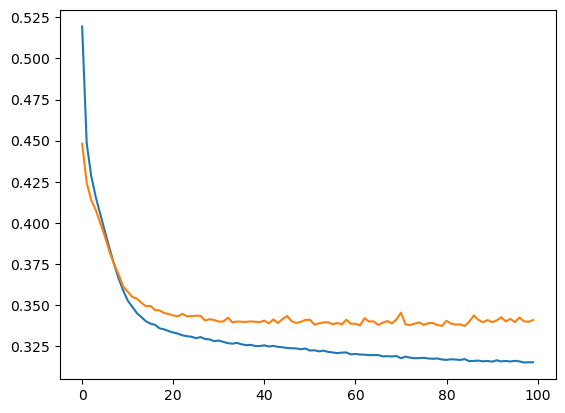

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

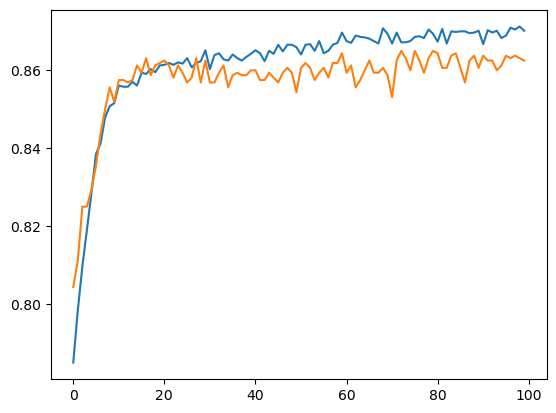

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [100]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten 

In [138]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [102]:
x_test.shape

(10000, 28, 28)

In [104]:
print(y_train.shape)
y_train

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

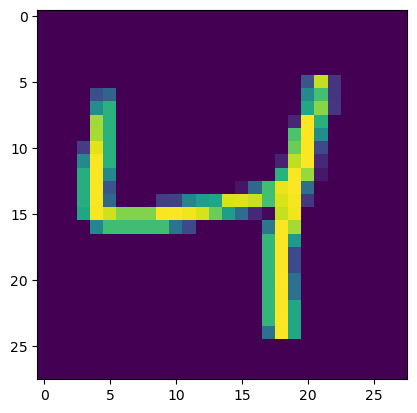

In [110]:
# yaha imshow  matplotlib ka ik key h jisse images ke array form ko images m changes kia ja sakta h
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [114]:
print(x_train[0].shape)
x_train[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [115]:
# ye step  array ki 0 ,1 ke alava ki values ko ko 0 se 1 ke bich m lane  lie 
x_train = x_train/255
x_test = x_test/255

In [116]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [122]:
# Flatten  image ke array ke multi dimansn data ko linear karne ke lie taki
#  model me use ho sake
model= Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
# softmax = 

In [121]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer='Adam',
              metrics=['accuracy'])

loss funn
    1 categorical_crossentropy 
    2 sparce_categorical_crossentrophy
 second vale loss fun se data onehot encoding kar ke data deta h jabki 
jisse hame alag se onehot encoding nahikarni padti
first vale loss function bina  inehotencoding kare data pr apply hota h

In [131]:
history = model.fit(x_train,y_train,epochs=25,validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2807 - accuracy: 0.9189 - val_loss: 0.1412 - val_accuracy: 0.9600
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1178 - accuracy: 0.9645 - val_loss: 0.1199 - val_accuracy: 0.9646
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0820 - accuracy: 0.9746 - val_loss: 0.0975 - val_accuracy: 0.9721
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.1130 - val_accuracy: 0.9664
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0475 - accuracy: 0.9847 - val_loss: 0.0938 - val_accuracy: 0.9730
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0995 - val_accuracy: 0.9724
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.0917 - val_accuracy:

In [132]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [133]:
##y_prob me  pratyek image ki 0 se 9  no  hone ki probability  hogi
# isme se jisno ki probability sabse jyada h vo prediction ho jayegi 
# use y_preb me save kar lenge
y_prob 

array([[4.8179734e-15, 2.6760443e-13, 3.8567999e-12, ..., 1.0000000e+00,
        3.2229963e-14, 1.2842485e-11],
       [1.6273670e-26, 5.3674695e-12, 1.0000000e+00, ..., 5.5398672e-24,
        7.6455803e-12, 6.6640348e-29],
       [2.8804961e-13, 9.9999917e-01, 6.2836438e-09, ..., 6.7264097e-07,
        6.9683772e-08, 1.8199522e-17],
       ...,
       [1.2331192e-34, 3.5255278e-20, 3.6021432e-29, ..., 1.4634461e-16,
        7.4731926e-22, 4.5993944e-15],
       [7.1032439e-22, 4.0618781e-21, 4.4199473e-17, ..., 1.0417511e-17,
        9.5868791e-07, 9.7262255e-21],
       [1.0612168e-18, 2.7597056e-25, 4.8308104e-26, ..., 1.2296163e-32,
        3.6253255e-24, 1.6330958e-32]], dtype=float32)

In [134]:
y_pred = y_prob.argmax(axis=1)

In [144]:
print(y_test.shape)
print(y_prob.shape)
print(y_pred.shape)

(10000,)
(10000, 10)
(10000,)


In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9775

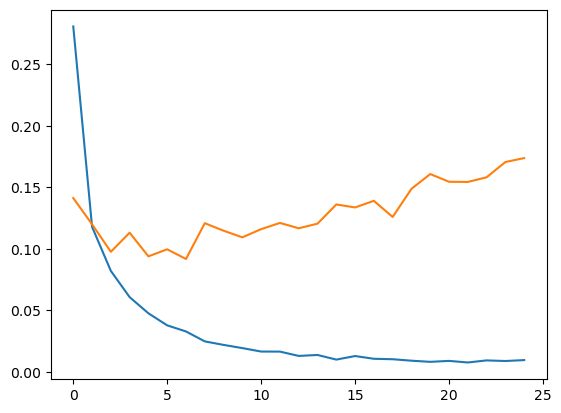

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

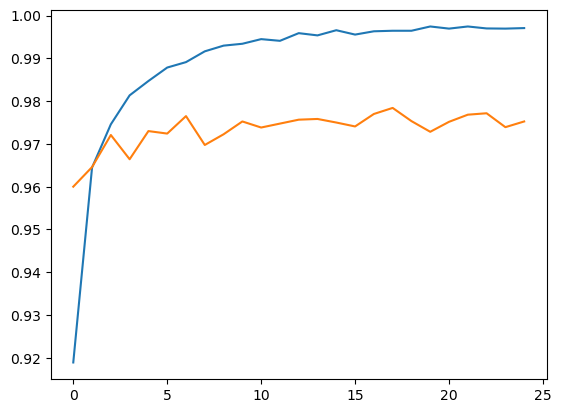

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [143]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 123ms/step


array([2], dtype=int64)